# A naive implementation of a QRAM

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastOracles as fo
import numpy as np

In [3]:
def int_to_bin(num: int, code_len: int):
    num = bin(num)[2:]
    num = '0'*(code_len-len(num)) + num
    return num


## Inizializzazione e lettura

Implementiamo la lettura degli indirizzi della QRAM tramite un grande oracolo.

$$
U_v|i\rangle |0\rangle \to |i\rangle|v[i]\rangle
$$

Questo, associerà in maniera opportuna l'indirizzo $i$ fornito in input, con l'elemento $v[i]$.

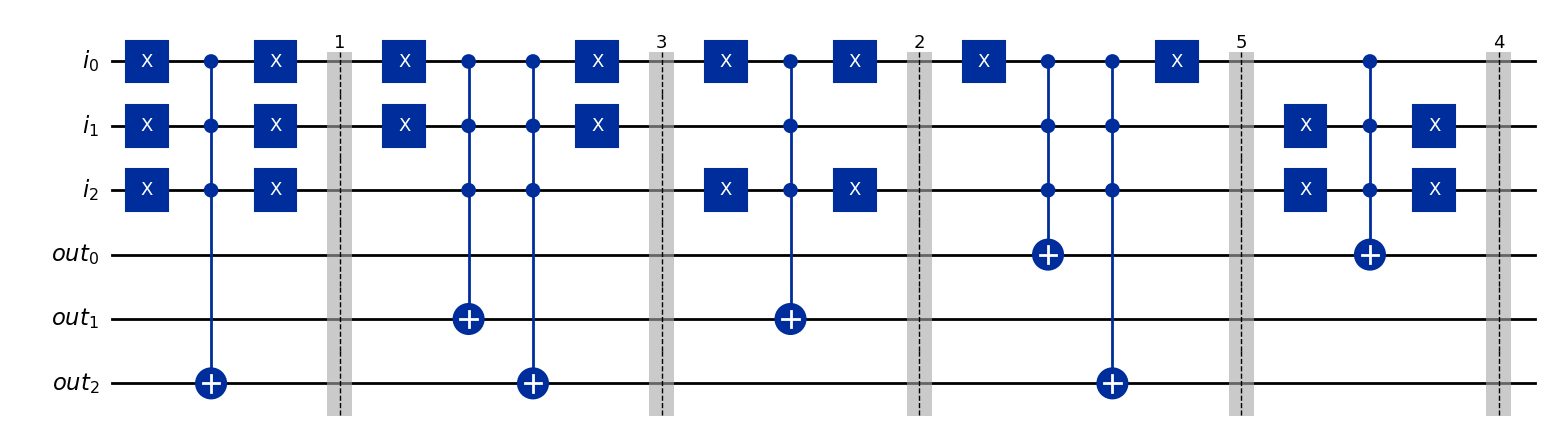

In [ ]:
V = [1,3,2,5,4]

def QuantumRAM(v: list[int]):
    n = len(v)
    d = int(np.log2(max(v))+1)
    m = int(np.log2(n)+1)
    
    ir = QuantumRegister(m, 'i')
    er = QuantumRegister(d, 'out')
    qc = QuantumCircuit(ir,er)

    for j in range(n):
        j_bin = int_to_bin(j, m)
        e_bin = int_to_bin(v[j], d)
        
        if int(e_bin) == 0:
            continue

        for p in [h for h in range(m) if j_bin[h]=='0']:
            qc.x(ir[p])

        for p in [h for h in range(d) if e_bin[h]=='1']:
            qc.mcx(ir, er[p])
            
        for p in [h for h in range(m) if j_bin[h]=='0']:
            qc.x(ir[p])
        
        qc.barrier(label=str(V[j])) # 
    return qc

qram = QuantumRAM(V)

# code_len = int(np.log2(max(V))+1)
# cr = ClassicalRegister(code_len, 'c')
# qram.add_register(cr)
# qram.measure(out,range(len(cr)))


qram.draw('mpl')


È interessante osservare la possibilità di fare accessi in sovrapposizione. Definiamo $n$ come il numero di bit di indirizzamento della QRAM.

$$
U_v|i\rangle|0\rangle =  \frac{1}{\sqrt{2}^n}\sum_{x \in \{0,1\}^n}(|x\rangle|v[x]\rangle)
$$


## Sovrascrittura di valori nella QRAM

TODO

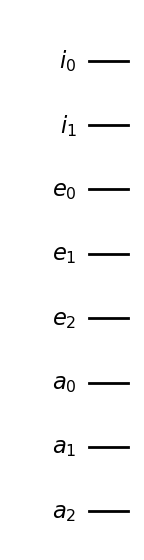

In [ ]:
def write(m,k,j,a):
    ir = QuantumRegister(m, 'i')
    er = QuantumRegister(k, 'e')
    ar = QuantumRegister(k, 'a')
    qc = QuantumCircuit(ir, er, ar)

    j_bin = bin(j)[2:]
    j_bin = '0'*(m-len(j_bin)) + j_bin
    
    a_bin = bin(a)[2:]
    a_bin = '0'*(k-len(a_bin)) + a_bin
    
    
    return qc

write(2,3,1,3).draw('mpl')